# Financial Planning with APIs and Simulations

This app has two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

This app will be using information from the Monte Carlo simulation to answer questions about the portfolio in Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
# suppressing warnings, remove as needed
import warnings
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
# by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

In [3]:
# suppressing warnings, comment this code as needed
# this will get rid of warnings in the notebook
warnings.filterwarnings('ignore')

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, we’ll determine the current value of a member’s cryptocurrency wallet. We’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, we’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH).


In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19095900,
            "id": 1,
            "last_updated": 1658051029,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 406908047610,
                    "percent_change_1h": -0.349300818348959,
                    "percent_change_24h": 3.41526639053796,
                    "percent_change_7d": -1.26904155753479,
                    "percentage_change_1h": -0.349300818348959,
                    "percentage_change_24h": 3.41526639053796,
                    "percentage_change_7d": -1.26904155753479,
                    "price": 21316.0,
                    "volume_24h": 40522718955
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19095900,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119712771,
            "id": 1027,
            "last_updated": 1658051035,
            "max_supply": 119712771,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 162460886080,
                    "percent_change_1h": -0.190068378092224,
                    "percent_change_24h": 13.4247324710367,
                    "percent_change_7d": 11.6434757038276,
                    "percentage_change_1h": -0.190068378092224,
                    "percentage_change_24h": 13.4247324710367,
                    "percentage_change_7d": 11.6434757038276,
                    "price": 1358.53,
                    "volume_24h": 20421343615
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119712771,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryp

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"].get("1", {}).get("quotes", {}).get("USD",{}).get("price", 0)

# Print the current price of BTC
print(f"${btc_price:.2f}")


$21316.00


In [10]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"].get("1027", {}).get("quotes", {}).get("USD",{}).get("price", 0)

# Print the current price of ETH
print(f"${eth_price:.2f}")


$1358.53


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"${btc_value:.2f}")


$25579.20


In [12]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"${eth_value:.2f}")


$7200.21


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = eth_value + btc_value

# Print current cryptocurrency wallet balance
print(f"${total_crypto_wallet:.2f}")


$32779.41


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, we’ll determine the current value of a member’s stock and bond holdings. We’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion.

#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: Create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-07-15", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-15", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Review the Alpaca DataFrame
df_portfolio


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-07-15 04:00:00+00:00  382.62  385.25  380.54  385.13  79318992   

                                                      AGG                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2022-07-15 04:00:00+00:00      488124  383.334989  101.94  102.35  101.9   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-15 04:00:00+00:00  102.25  8440151       27300  102.214854

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = df_portfolio["AGG"]["close"][0].astype(float)

# Print the AGG closing price
print(f"${agg_close_price:.2f}")

$102.25


In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = df_portfolio["SPY"]["close"][0].astype(float)

# Print the SPY closing price
print(f"${spy_close_price:.2f}")

$385.13


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"${agg_value:.2f}")


$20450.00


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"${spy_value:.2f}")


$42364.30


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"${total_stocks_bonds:.2f}")


$62814.30


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f"${total_portfolio:.2f}")


$95593.71


### Evaluate the Emergency Fund

In this section, we’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan.

#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[32779.409, 62814.3]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display the savings_df DataFrame
savings_df

,amount
crypto,32779.409
stock/bond,62814.300


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Savings breakdown'}, ylabel='amount'>

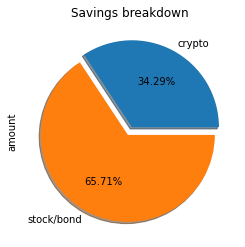

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df['amount'].plot(kind='pie', title='Savings breakdown', autopct='%2.2f%%', shadow=True, explode=[0.05, 0.05])


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. 

##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000.

In [27]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations! Your total portfolio of ${total_portfolio:.2f} is large enough to fund an emergency portfolio!")
elif total_portfolio == emergency_fund_value:
    print(f"Congratulations for reaching your emegency portfolio goal. Your total portfolio is ${total_portfolio:.2f}.")
else:
    remaining_goal = emergency_fund_value - total_portfolio
    print(f"Your current total portfolio is ${total_portfolio:.2f}. You are ${remaining_goal:.2f} away from your portfolio goal.")


Congratulations! Your total portfolio of $95593.71 is large enough to fund an emergency portfolio!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, we’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio.


#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
start_date = pd.Timestamp("2019-07-15", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-15", tz="America/New_York").isoformat()

In [30]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
merged_portfolio = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
display(merged_portfolio.head())
display(merged_portfolio.tail())


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  301.12  301.13  300.19  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.44  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.74  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.70  298.83  53567032   
2019-07-19 04:00:00+00:00  300.01  300.07  296.96  297.17  76794138   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2019-07-15 04:00:00+00:00      149900  300.605019  110.87  110.960  110.85   
2019-07-16 04:00:00+00:00      183816  300.108039  110.75  110.830  110.64   
2019-07-17 04:00:00+00:00      200151  298.543544  110.93  111.140  110.91   
2019-07-18 04:00:00+00:00      236661  298.067797  111.10  111.330  111.06   
2019-07-19 04:00:00+00:00      260715  298.617649  111.22  111.286  111.14   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-07-15 04:00:00+00:00  110.95  3619089       10885  110.925638  
2019-07-16 04:00:00+00:00  110.83  2149083       12676  110.743438  
2019-07-17 04:00:00+00:00  111.12  2985610       11771  111.066605  
2019-07-18 04:00:00+00:00  111.30  5982223       17331  111.220550  
2019-07-19 04:00:00+00:00  111.17  3150774        9948  111.225017

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-07-11 04:00:00+00:00  385.91  386.8700  383.500  384.23  58100363   
2022-07-12 04:00:00+00:00  383.66  386.1600  378.990  380.83  62027220   
2022-07-13 04:00:00+00:00  375.09  381.9200  374.658  378.83  83575452   
2022-07-14 04:00:00+00:00  373.99  379.0498  371.040  377.91  89349688   
2022-07-15 04:00:00+00:00  382.62  385.2500  380.540  385.13  79318992   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-07-11 04:00:00+00:00      473423  384.871994  101.67  101.92  101.6029   
2022-07-12 04:00:00+00:00      512244  382.617620  102.02  102.19  101.8200   
2022-07-13 04:00:00+00:00      671953  378.819688  101.23  102.24  101.1900   
2022-07-14 04:00:00+00:00      637416  375.589384  101.51  101.98  101.3300   
2022-07-15 04:00:00+00:00      488124  383.334989  101.94  102.35  101.9000   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-11 04:00:00+00:00  101.70  5758310       17084  101.720884  
2022-07-12 04:00:00+00:00  101.84  6664991       21057  102.039440  
2022-07-13 04:00:00+00:00  102.21  6514247       26716  101.977478  
2022-07-14 04:00:00+00:00  101.85  6224496       24722  101.747120  
2022-07-15 04:00:00+00:00  102.25  8440151       27300  102.214854

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 60% to SPY and 40% to AGG. 
# Run 500 samples.
thirty_year_simulation = MCSimulation(
    portfolio_data=merged_portfolio,
    weights=[0.60, 0.40],
    num_simulation=500,
    num_trading_days=252*30,
)

# Review the simulation input data
thirty_year_simulation.portfolio_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  301.12  301.13  300.19  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.44  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.74  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.70  298.83  53567032   
2019-07-19 04:00:00+00:00  300.01  300.07  296.96  297.17  76794138   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00      149900  300.605019          NaN  110.87   
2019-07-16 04:00:00+00:00      183816  300.108039    -0.003458  110.75   
2019-07-17 04:00:00+00:00      200151  298.543544    -0.006573  110.93   
2019-07-18 04:00:00+00:00      236661  298.067797     0.003661  111.10   
2019-07-19 04:00:00+00:00      260715  298.617649    -0.005555  111.22   

                                                                         \
                              high     low   close   volume trade_count   
timestamp                                                                 
2019-07-15 04:00:00+00:00  110.960  110.85  110.95  3619089       10885   
2019-07-16 04:00:00+00:00  110.830  110.64  110.83  2149083       12676   
2019-07-17 04:00:00+00:00  111.140  110.91  111.12  2985610       11771   
2019-07-18 04:00:00+00:00  111.330  111.06  111.30  5982223       17331   
2019-07-19 04:00:00+00:00  111.286  111.14  111.17  3150774        9948   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  110.925638          NaN  
2019-07-16 04:00:00+00:00  110.743438    -0.001082  
2019-07-17 04:00:00+00:00  111.066605     0.002617  
2019-07-18 04:00:00+00:00  111.220550     0.001620  
2019-07-19 04:00:00+00:00  111.225017    -0.001168

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996907,0.987032,0.989880,0.997144,1.013095,1.001544,1.002506,0.989538,0.994076,0.984632,...,1.006810,1.012200,0.993007,1.006800,1.000268,0.986735,1.001666,1.012913,1.017896,1.005026
2,0.999273,0.985649,0.989794,0.990505,1.025276,0.994386,1.003251,0.999611,0.991274,0.993203,...,1.003109,1.009533,0.987752,0.991317,0.984659,0.991941,1.006183,1.006335,1.020523,1.002382
3,1.003606,0.984566,0.967527,0.999165,1.023078,0.994756,1.006675,1.005213,1.007754,0.997818,...,1.000863,0.998458,0.978055,0.992469,0.978852,0.992710,1.004213,1.014737,1.024345,0.998922
4,0.995309,0.974517,0.976302,0.986882,1.046219,0.982255,1.013966,1.006084,1.000190,0.982826,...,1.004251,0.992003,0.993297,1.005011,0.988410,0.986947,1.006038,1.035330,1.006990,0.997317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.957979,5.539091,2.356932,5.711207,1.834382,0.512035,1.138176,2.992735,0.850104,2.326698,...,5.334579,9.556647,1.363647,6.532187,9.451698,6.275990,1.325079,1.036396,1.975488,2.867054
7557,2.995326,5.544661,2.365411,5.765854,1.833001,0.514669,1.143705,2.988685,0.845715,2.284671,...,5.356807,9.652265,1.353272,6.536559,9.487301,6.238708,1.338724,1.033258,1.961390,2.870666
7558,3.029512,5.478517,2.386004,5.662753,1.829996,0.514904,1.151794,2.999133,0.839109,2.276029,...,5.342714,9.724024,1.362158,6.550203,9.561886,6.170928,1.353800,1.029690,1.979874,2.853092
7559,3.046190,5.391640,2.378056,5.627399,1.835773,0.511238,1.158259,3.018775,0.841637,2.313365,...,5.340919,9.705150,1.372713,6.554236,9.652144,6.182569,1.343748,1.012879,1.968355,2.862993


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

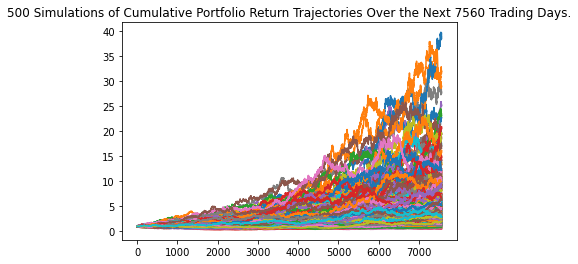

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
thirty_year_simulation.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

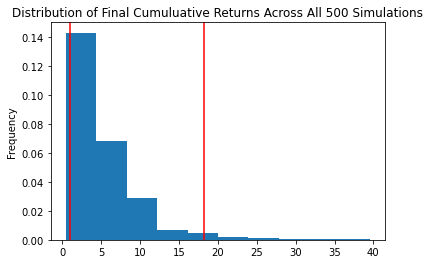

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
thirty_year_simulation.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
thirty_year_simulation_results = thirty_year_simulation.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
thirty_year_simulation_results

count           500.000000
mean              5.232695
std               4.673871
min               0.434791
25%               2.295569
50%               3.692560
75%               6.433882
max              39.583738
95% CI Lower      0.995165
95% CI Upper     18.150196
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [36]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'${total_stocks_bonds:.2f}')


$62814.30


In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(thirty_year_simulation_results[8]*total_stocks_bonds, 2)
ci_upper_thirty_cumulative_return = round(thirty_year_simulation_results[9]*total_stocks_bonds, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that an initial investment of $62814.30 in the portfolio over the next 30 years will end within in the range of $62510.57 and $1140091.89.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. Next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier (10 years).


In [38]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 80% to SPY and 20% to AGG.
# Run 500 samples.
ten_year_simulation = MCSimulation(
    portfolio_data=merged_portfolio,
    weights=[0.80, 0.20],
    num_simulation=500,
    num_trading_days=252*10,
)

# Review the simulation input data
ten_year_simulation.portfolio_data.head()


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  301.12  301.13  300.19  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.44  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.74  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.70  298.83  53567032   
2019-07-19 04:00:00+00:00  300.01  300.07  296.96  297.17  76794138   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00      149900  300.605019          NaN  110.87   
2019-07-16 04:00:00+00:00      183816  300.108039    -0.003458  110.75   
2019-07-17 04:00:00+00:00      200151  298.543544    -0.006573  110.93   
2019-07-18 04:00:00+00:00      236661  298.067797     0.003661  111.10   
2019-07-19 04:00:00+00:00      260715  298.617649    -0.005555  111.22   

                                                                         \
                              high     low   close   volume trade_count   
timestamp                                                                 
2019-07-15 04:00:00+00:00  110.960  110.85  110.95  3619089       10885   
2019-07-16 04:00:00+00:00  110.830  110.64  110.83  2149083       12676   
2019-07-17 04:00:00+00:00  111.140  110.91  111.12  2985610       11771   
2019-07-18 04:00:00+00:00  111.330  111.06  111.30  5982223       17331   
2019-07-19 04:00:00+00:00  111.286  111.14  111.17  3150774        9948   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  110.925638          NaN  
2019-07-16 04:00:00+00:00  110.743438    -0.001082  
2019-07-17 04:00:00+00:00  111.066605     0.002617  
2019-07-18 04:00:00+00:00  111.220550     0.001620  
2019-07-19 04:00:00+00:00  111.225017    -0.001168

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997073,1.002718,1.004617,1.000840,0.996644,1.002137,1.000712,0.992900,0.987809,1.003521,...,0.995671,0.991783,1.011773,0.993658,0.996319,1.008074,0.978473,1.000985,0.999540,1.002362
2,0.981704,1.003135,0.993099,1.019915,1.000131,1.013714,0.989743,0.997983,1.004909,1.019913,...,0.982801,0.970363,0.990897,0.986909,0.995821,1.008570,0.989343,0.998654,0.986376,0.999620
3,0.982642,0.995380,0.982186,1.031829,0.999073,1.021050,0.983623,0.993754,1.026197,1.020191,...,1.024088,0.975924,0.980287,0.975303,1.001808,1.012970,0.982285,1.014319,0.982427,1.023344
4,0.980959,1.005628,0.977261,1.020728,1.000499,1.018589,0.987826,0.996517,1.028707,1.014406,...,1.029106,0.969769,0.982779,0.990218,1.009444,1.019446,0.970017,1.013468,0.983896,1.022406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.802391,2.103416,1.325049,1.734622,2.348509,0.866890,1.372692,0.915960,4.036382,2.538165,...,4.299891,2.435546,1.901672,1.295191,1.431832,4.018639,1.238981,2.503963,1.117651,3.809782
2517,1.819108,2.160319,1.318280,1.726812,2.325672,0.874216,1.373613,0.916216,4.010029,2.554825,...,4.323146,2.416376,1.861402,1.275899,1.454013,4.072974,1.231008,2.552270,1.144407,3.735223
2518,1.843752,2.116919,1.319404,1.754974,2.339751,0.864350,1.368501,0.911040,4.037279,2.570011,...,4.306416,2.451313,1.848798,1.252630,1.427856,4.048684,1.241750,2.549461,1.141905,3.724110
2519,1.788392,2.116053,1.307437,1.731540,2.395429,0.860103,1.364808,0.925703,4.075201,2.610428,...,4.366889,2.480164,1.839231,1.259171,1.399268,4.079169,1.241734,2.538012,1.139999,3.689099


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_year_simulation.plot_simulation()


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_year_simulation.plot_distribution()


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_year_simulation_results = ten_year_simulation.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
ten_year_simulation_results

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'${total_stocks_bonds:.2f}')


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return =  round(ten_year_simulation_results[8]*total_stocks_bonds, 2)

ci_upper_ten_cumulative_return = round(ten_year_simulation_results[9]*total_stocks_bonds, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?